# Is the proportion of food-related Wikipedia articles that mention the word ‘people’ higher than the proportion of non-food-related articles that mention ‘people’?


groups being compared:
food-related articles and non-food-related articles

(also I used google colab because I think it ran better, or for me, was just easier to use because I would always refresh the anaconda notebook page)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
url = "https://en.wikipedia.org/w/api.php"

In [20]:
import requests

session = requests.Session()
headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}
groups = ["food", "non-food"]
results = {"food": 0, "non-food": 0}
total_articles = {"food": 0, "non-food": 0}
categories = ["Fruit dishes" ,"Foods", "Fast food", "Italian cuisine"]
food_articles = []
sample_size = 500


In [21]:
def get_Food_articles(category, limit=sample_size):
    url = "https://en.wikipedia.org/w/api.php"
    titles = []
    cmcontinue = None

    while len(titles) < limit:
        params = {
            "action": "query",
            "list": "categorymembers",
            "cmtitle": f"Category:{category}",
            "cmlimit": min(50, limit - len(titles)),
            "format": "json"
        }
        if cmcontinue:
            params["cmcontinue"] = cmcontinue

        response = session.get(url, params=params, headers=headers)
        data = response.json()

        members = data["query"]["categorymembers"]
        titles.extend([m["title"] for m in members])
        if "continue" not in data:
            break

        cmcontinue = data["continue"]["cmcontinue"]

    return titles[:limit]
def mentions_People(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "titles": title,
        "prop": "extracts",
        "explaintext": True,
        "redirects": 1,
        "format": "json"
    }
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    pages = data["query"]["pages"]
    page_id = list(pages.keys())[0]
    content = pages[page_id].get("extract", "")
    return "people" in content.lower()

for i in categories:
    food_articles.extend(get_Food_articles(i, limit=sample_size))
food_articles = list(set(food_articles))

In [22]:
def mentions_People(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "titles": title,
        "prop": "extracts",
        "explaintext": True,
        "redirects": 1,
        "format": "json"
    }
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    pages = data["query"]["pages"]
    page_id = list(pages.keys())[0]
    content = pages[page_id].get("extract", "")
    return "people" in content.lower()

non_food_articles = []
while len(non_food_articles) < sample_size:
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,
        "format": "json"
    }
    response = session.get("https://en.wikipedia.org/w/api.php", params=params, headers=headers)
    data = response.json()
    title = data["query"]["random"][0]["title"]
    if title not in food_articles and title not in non_food_articles:
        non_food_articles.append(title)

results = {"food": 0, "non-food": 0}
count1 = 0
for title in food_articles:
    total_articles["food"] += 1
    print("food articles", count1)
    count1 += 1
    if mentions_People(title):
        results["food"] += 1
count2 = 0
for title in non_food_articles:
    total_articles["non-food"] += 1
    print("non-food articles", count2)
    count2 +=1
    if mentions_People(title):
        results["non-food"] += 1
print("food articles that mention people",results["food"])
print("non-food articles that mention people",results["non-food"])


food articles 0
food articles 1
food articles 2
food articles 3
food articles 4
food articles 5
food articles 6
food articles 7
food articles 8
food articles 9
food articles 10
food articles 11
food articles 12
food articles 13
food articles 14
food articles 15
food articles 16
food articles 17
food articles 18
food articles 19
food articles 20
food articles 21
food articles 22
food articles 23
food articles 24
food articles 25
food articles 26
food articles 27
food articles 28
food articles 29
food articles 30
food articles 31
food articles 32
food articles 33
food articles 34
food articles 35
food articles 36
food articles 37
food articles 38
food articles 39
food articles 40
food articles 41
food articles 42
food articles 43
food articles 44
food articles 45
food articles 46
food articles 47
food articles 48
food articles 49
food articles 50
food articles 51
food articles 52
food articles 53
food articles 54
food articles 55
food articles 56
food articles 57
food articles 58
food ar

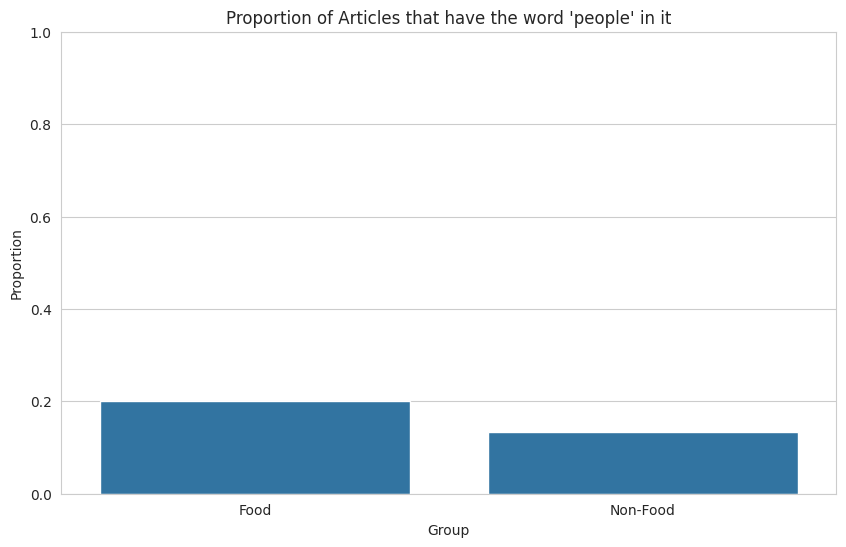

In [24]:

df = pd.DataFrame({
    "Group": ["Food", "Non-Food"],
    "Proportion": [results["food"]/total_articles["food"],
                   results["non-food"]/total_articles["non-food"]]
})

sns.barplot(x="Group", y="Proportion", data=df)
plt.ylim(0,1)
plt.title("Proportion of Articles that have the word 'people' in it")
plt.ylabel("Proportion")
plt.show()

In [25]:
proportions = {g: results[g]/total_articles[g] for g in groups}
print("Proportions:", proportions)

p1 = proportions["food"]
p2 = proportions["non-food"]
n1 = total_articles["food"]
n2 = total_articles["non-food"]

if n1 == 0 or n2 == 0:
    raise ValueError("One of the sample sizes is zero. Can't compute CI.")


SE_diff = ((p1*(1-p1)/n1) + (p2*(1-p2)/n2)) ** 0.5
MOE = 1.96 * SE_diff
diff = p1 - p2
# margin of error check
if MOE > 0.10:
    print("Margin of error > 0.10")

CI_lower = diff - MOE
CI_upper = diff + MOE
print("Difference in proportions (food - non-food):", diff)
print("Standard Error:", SE_diff)
print("Margin of Error:", MOE)
print("95% Confidence Interval:", (CI_lower, CI_upper))

Proportions: {'food': 0.20046082949308755, 'non-food': 0.134}
Difference in proportions (food - non-food): 0.06646082949308754
Standard Error: 0.024523217501330907
Margin of Error: 0.04806550630260858
95% Confidence Interval: (0.018395323190478964, 0.11452633579569613)


Answer: claim: there is a difference between articles that are food related and articles that aren't because the word 'people' appears more in food related articles

the standard error is 0.0245, and it tells me that it is large enough to be meaningful.

the margin of error that is ≤ 0.10 is 0.0481, and because it is small it is more reliable so it likely reflects the true population difference.

the 95% Confidence Interval is (0.0184, 0.115), and because it is positive and not 0 I am confident that the proportion of food articles mentioning “people” is higher than that of non-food articles.

Based on my three pieces of evidence, there is enough evidence that food-related articles are more likely to mention 'people' than non-food-related articles.